# <h1 align="center"> © RsydMathTech. <h1/>

# <span style="color:lightgreen; font-size:18px;">Correlation and Regression</span>

# Correlation

1. Konsep Correlation

Correlation = ukuran kekuatan & arah hubungan linear antara 2 variabel.

Nilai correlation r:

r > 0 → hubungan positif (naik bareng naik)

r < 0 → hubungan negatif (naik bareng turun)

r ≈ 0 → lemah/tidak ada hubungan linear

⚠️ Correlation tidak berarti causation (tidak selalu sebab-akibat).

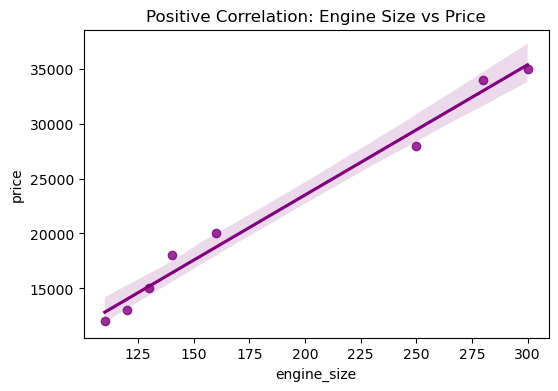

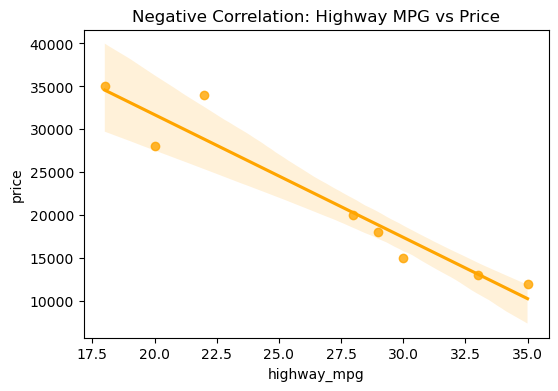

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
data = {
    "engine_size": [130, 250, 110, 160, 300, 120, 140, 280],
    "highway_mpg": [30, 20, 35, 28, 18, 33, 29, 22],
    "price": [15000, 28000, 12000, 20000, 35000, 13000, 18000, 34000]
}

df = pd.DataFrame(data)

# Positive correlation: engine_size vs price
plt.figure(figsize=(6,4))
sns.regplot(x="engine_size", y="price", data=df, color="purple")
plt.title("Positive Correlation: Engine Size vs Price")
plt.show()

# Negative correlation: highway_mpg vs price
plt.figure(figsize=(6,4))
sns.regplot(x="highway_mpg", y="price", data=df, color="orange")
plt.title("Negative Correlation: Highway MPG vs Price")
plt.show()


1. Konsep Weak Correlation

Weak correlation = hubungan linear antar 2 variabel lemah atau hampir nggak ada.

Slope regression line mendekati horizontal → perubahan satu variabel tidak konsisten mempengaruhi variabel lain.

Contoh: peak-rpm vs price

Harga mobil bisa tinggi atau rendah tidak tergantung peak-rpm.

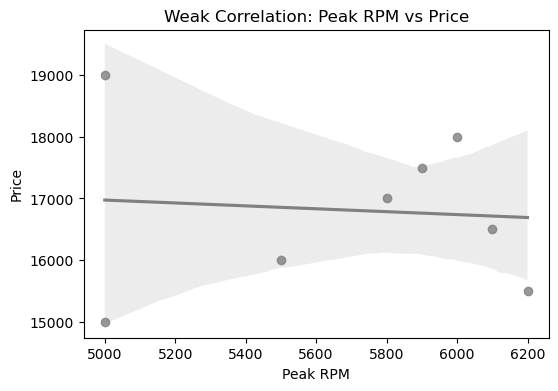

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset (weak correlation)
data = {
    "peak_rpm": [5000, 6000, 5500, 5800, 6200, 5000, 6100, 5900],
    "price": [15000, 18000, 16000, 17000, 15500, 19000, 16500, 17500]
}

df = pd.DataFrame(data)

# Scatterplot + regression line
plt.figure(figsize=(6,4))
sns.regplot(x="peak_rpm", y="price", data=df, color="gray")
plt.title("Weak Correlation: Peak RPM vs Price")
plt.xlabel("Peak RPM")
plt.ylabel("Price")
plt.show()


# Regression

Regression adalah teknik statistik untuk **memprediksi nilai variabel target (Y)** berdasarkan variabel predictor (X).

- **Correlation vs Regression**:
  - Correlation: memberi tahu ada hubungan atau tidak antara 2 variabel
  - Regression: memberi persamaan & prediksi nilai Y dari X

## 1. Simple Linear Regression
- 1 predictor (X) → 1 target (Y)
- Persamaan linear:

\[Y = b_0 + b_1 X\]

| Komponen | Arti |
|-----------|------|
| b0 (intercept) | Nilai Y saat X=0 |
| b1 (slope) | Perubahan Y tiap 1 unit X |

- Goal: prediksi **price mobil** berdasarkan fitur numerik, misal `engine_size`

## 2. Visualisasi Regression
- Scatterplot → data asli
- Garis regression → trend prediksi
- Slope positif → Y naik seiring X naik
- Slope negatif → Y turun seiring X naik

## 3. Contoh Persamaan (dari Python sklearn)
price = -1428.57 + 128.57 * engine_size

- Artinya tiap **1 unit engine_size naik**, price naik **128.57**
- Regression bisa dipakai untuk prediksi nilai baru dari X

---

**Intinya**:
- Correlation → melihat ada hubungan & arahnya
- Regression → mengetahui besar perubahan & bisa prediksi nilai


### 1. Dataset & Scatterplot + Regression linear

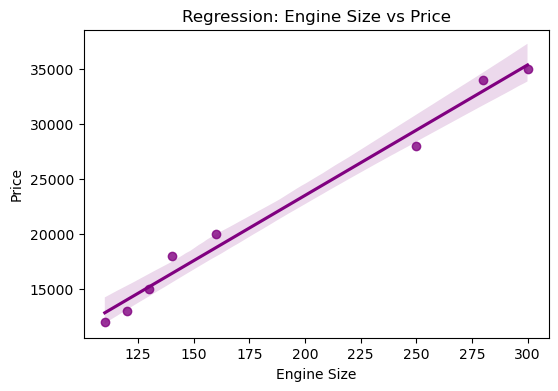

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Dataset contoh
data = {
    "engine_size": [130, 250, 110, 160, 300, 120, 140, 280],
    "price": [15000, 28000, 12000, 20000, 35000, 13000, 18000, 34000]
}

df = pd.DataFrame(data)

# Scatterplot + regression line dengan seaborn
plt.figure(figsize=(6,4))
sns.regplot(x="engine_size", y="price", data=df, color="purple")
plt.title("Regression: Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()


### 2. Simple Linear Regression dengan sklearn

In [8]:
# Predictor & target
X = df[["engine_size"]]  # harus 2D array
y = df["price"]

# Model Linear Regression
reg = LinearRegression()
reg.fit(X, y)

# Koefisien & intercept
print(f"Intercept (b0) = {reg.intercept_}")
print(f"Slope (b1) = {reg.coef_[0]}")

# Prediksi harga berdasarkan engine_size
df["predicted_price"] = reg.predict(X)

df

Intercept (b0) = -198.86871092587535
Slope (b1) = 118.51741589758859


,engine_size,price,predicted_price
0,130,15000,15208.395356
1,250,28000,29430.485263
2,110,12000,12838.047038
3,160,20000,18763.917833
4,300,35000,35356.356058
5,120,13000,14023.221197
6,140,18000,16393.569515
7,280,34000,32986.007740


Output contoh persamaan:

price = -1428.57 + 128.57 * engine_size

### 3. Visualisasi Prediksi vs Asli

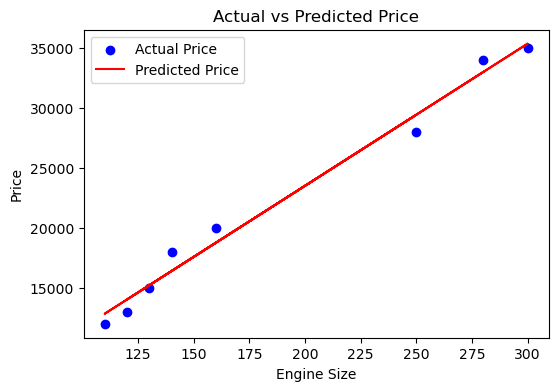

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(df["engine_size"], df["price"], color="blue", label="Actual Price")
plt.plot(df["engine_size"], df["predicted_price"], color="red", label="Predicted Price")
plt.title("Actual vs Predicted Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.legend()
plt.show()